In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn

In [ ]:
#Criando um dataset de exemplo para regressão
X, y = mglearn.datasets.make_wave(n_samples=120)

In [9]:
#Criando um dataset de exemplo que possui 1000 pontos entre -3 e 3 e em seguida dando um reshape para que ele fique no formato de uma coluna
X_teste = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

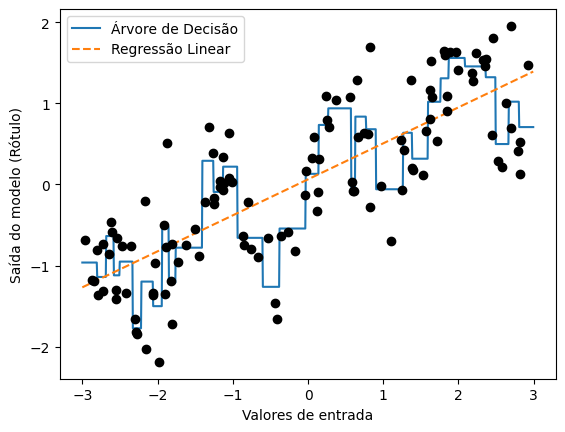

In [7]:
reg_tre = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(X_teste, reg_tre.predict(X_teste), label="Árvore de Decisão")

reg_lin = LinearRegression().fit(X, y)
plt.plot(X_teste, reg_lin.predict(X_teste), '--', label="Regressão Linear")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Valores de entrada")
plt.ylabel("Saída do modelo (Rótulo)")
plt.legend(loc="best")

In [8]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [9]:
X_binned = kb.transform(X)
X_binned[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

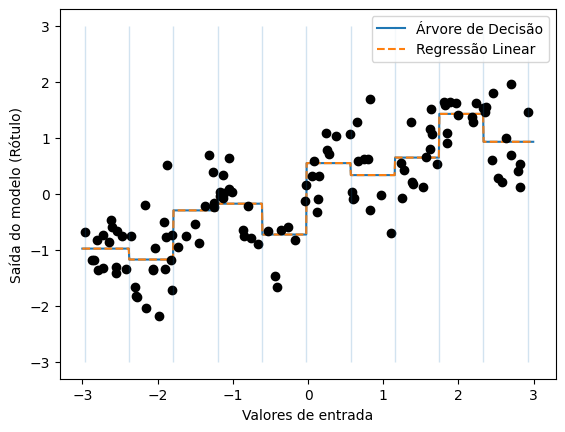

In [10]:
X_teste_binned = kb.transform(X_teste)

reg_tre = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned, y)
plt.plot(X_teste, reg_tre.predict(X_teste_binned), label="Árvore de Decisão")

reg_lin = LinearRegression().fit(X_binned, y)
plt.plot(X_teste, reg_lin.predict(X_teste_binned), '--', label="Regressão Linear")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.xlabel("Valores de entrada")
plt.ylabel("Saída do modelo (Rótulo)")
plt.legend(loc="best")

In [11]:
X_combined = np.hstack([X, X_binned])

In [12]:
X_combined[:5]

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

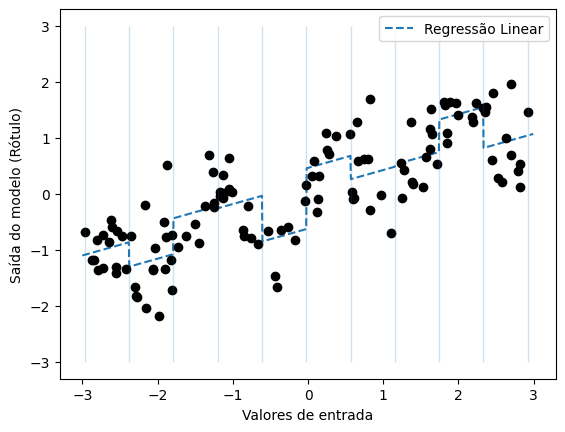

In [13]:
X_teste_combined = np.hstack([X_teste, X_teste_binned])

reg_lin = LinearRegression().fit(X_combined, y)
plt.plot(X_teste, reg_lin.predict(X_teste_combined), '--', label="Regressão Linear")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.xlabel("Valores de entrada")
plt.ylabel("Saída do modelo (Rótulo)")
plt.legend(loc="best")

In [14]:
X_product = np.hstack([X_binned, X_binned * X])
X_product[:5]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.39196365,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  

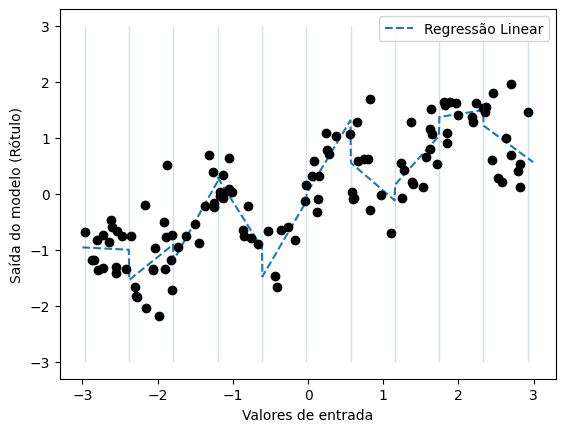

In [15]:
X_teste_product = np.hstack([X_teste_binned, X_teste_binned * X_teste])
reg_lin = LinearRegression().fit(X_product, y)
plt.plot(X_teste, reg_lin.predict(X_teste_product), '--', label="Regressão Linear")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.xlabel("Valores de entrada")
plt.ylabel("Saída do modelo (Rótulo)")
plt.legend(loc="best")

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)
X_poly_teste = poly.transform(X_teste)

In [21]:
X_poly[:5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [22]:
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

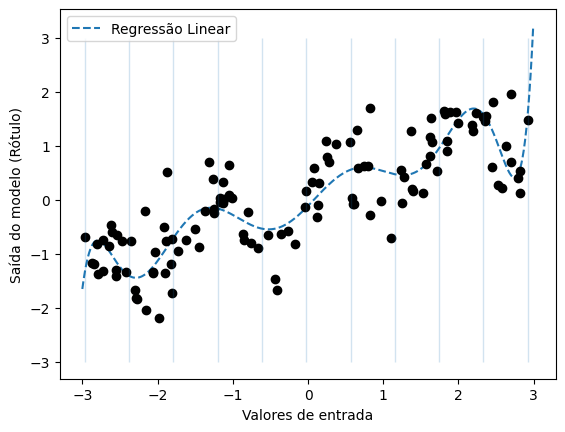

In [23]:
reg_lin = LinearRegression().fit(X_poly, y)
plt.plot(X_teste, reg_lin.predict(X_poly_teste), '--', label="Regressão Linear")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.xlabel("Valores de entrada")
plt.ylabel("Saída do modelo (Rótulo)")
plt.legend(loc="best")